# Codig Discus
# Joanne Lauer

In [12]:
import pandas as pd
import numpy as np
import missingno as miss
from plotnine import *
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [4]:
# For pre-processing data 
from sklearn import preprocessing as pp 
from sklearn.compose import ColumnTransformer 

# For pre-processing data 
from sklearn import preprocessing as pp 
from sklearn.compose import ColumnTransformer 

# For splits and CV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold # Cross validation 
from sklearn.model_selection import cross_validate # Cross validation 
from sklearn.model_selection import GridSearchCV # Cross validation + param. tuning.

# Machine learning methods 
from sklearn.linear_model import LinearRegression as LM
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.tree import DecisionTreeRegressor as DTree
from sklearn import tree # For plotting the decision tree rules
from sklearn.ensemble import BaggingRegressor as Bag
from sklearn.ensemble import RandomForestRegressor as RF

# For evaluating our model's performance
import sklearn.metrics as m

# Pipeline to combine modeling elements
from sklearn.pipeline import Pipeline

In [6]:
# Load data 
train_data = pd.read_csv("/Users/joannespringer/coding_discussions_ppol564_fall2021/06_coding_discussion/train_data.csv") # Training data
test_data = pd.read_csv("/Users/joannespringer/coding_discussions_ppol564_fall2021/06_coding_discussion/test_data.csv") # Test data 

In [8]:
# verify the file
train_data.head()

,OBJECTID,SSL,BATHRM,HF_BATHRM,HEAT,HEAT_D,AC,NUM_UNITS,ROOMS,BEDRM,...,ROOF,ROOF_D,INTWALL,INTWALL_D,KITCHENS,FIREPLACES,USECODE,LANDAREA,GIS_LAST_MOD_DTTM,LN_PRICE
0,78021,4061N 0085,3.0,1.0,1.0,Forced Air,Y,1.0,9.0,4.0,...,2.0,Built Up,6.0,Hardwood,1.0,0.0,11,2234,2018-07-22T18:01:43.000Z,13.591116
1,28783,1587 0075,2.0,1.0,7.0,Warm Cool,Y,1.0,7.0,3.0,...,11.0,Slate,6.0,Hardwood,1.0,1.0,12,3850,2018-07-22T18:01:43.000Z,12.730801
2,35035,2024 0817,2.0,2.0,13.0,Hot Water Rad,Y,1.0,9.0,4.0,...,11.0,Slate,6.0,Hardwood,1.0,1.0,12,7866,2018-07-22T18:01:43.000Z,13.651814
3,67983,3736 0059,1.0,1.0,7.0,Warm Cool,Y,1.0,6.0,3.0,...,2.0,Built Up,6.0,Hardwood,1.0,0.0,13,2739,2018-07-22T18:01:43.000Z,12.860999
4,8791,0817 0826,2.0,0.0,13.0,Hot Water Rad,N,1.0,11.0,4.0,...,6.0,Metal- Sms,6.0,Hardwood,1.0,0.0,11,2097,2018-07-22T18:01:43.000Z,14.100690


<AxesSubplot:>

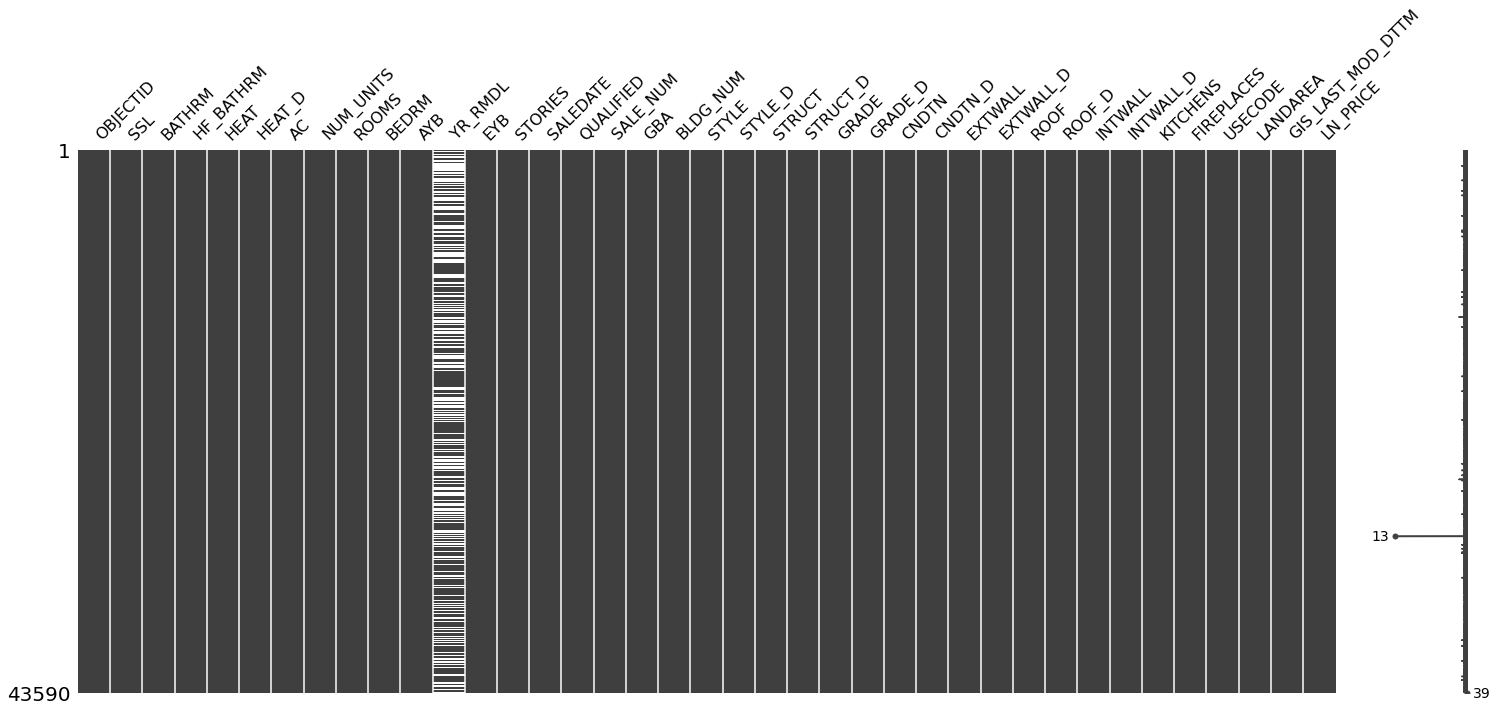

In [13]:
# Look at missing data
miss.matrix(train_data)

In [15]:
# Drop missing values
train_data = train_data.dropna()


In [18]:
# Look at training data features
# Outvcome...selling price
train_y = train_data['LN_PRICE']
# Sale Price Predictors
train_x = train_data[['BATHRM', 'HF_BATHRM', 'ROOMS', 'BEDRM']]

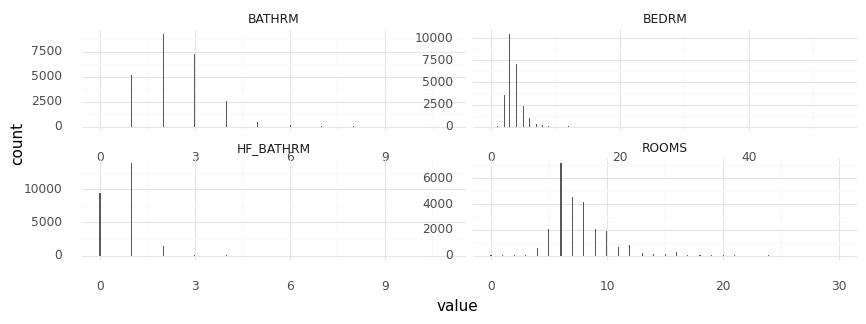

<ggplot: (337291517)>

In [20]:
# View each feature distribution
(
    ggplot(train_x.melt(),aes(x="value")) + 
    geom_histogram() +
    facet_wrap("variable",scales="free") +
    theme_minimal() +
    theme(figure_size = (10,3)) 
) 

In [28]:
# Modeling
fold_generator = KFold(n_splits=5, shuffle=True,random_state=111)
use_metrics = ["neg_mean_squared_error"]
# Preprocessing
preprocess = ColumnTransformer(transformers=[('num', pp.MinMaxScaler(), ['BATHRM', 'HF_BATHRM', 'ROOMS', 'BEDRM'])])
# Model Pipelie
pipe = Pipeline(steps=[('pre_process', preprocess),('model',None)])

In [29]:
# Specify the models and their repsective tuning pa
# Note the naming convention here to reference the mode
search_space = [
    # Linear Model
    {'model' : [LM()]},
    
    # KNN with K tuning param
    {'model' : [KNN()],
     'model__n_neighbors':[10,15,20,25,30]},
    
    # Decision Tree with the Max Depth Param
    {'model': [DTree()],
     'model__max_depth':[1,2,3,5]},
    
    # The Bagging decision tree model 
    {'model': [Bag()]},
    
    # Random forest with the N Estimators tuning param
    {'model' : [RF()],
     'model__max_depth':[1,2,3],
     'model__n_estimators':[500,1000,1250]},
]

In [30]:
# Put it all together 
search = GridSearchCV(pipe, search_space, 
                      cv = fold_generator,
                      scoring='neg_mean_squared_error',
                      n_jobs=4)

# Fit the model to the training data
search.fit(train_x,train_y)

GridSearchCV(cv=KFold(n_splits=5, random_state=111, shuffle=True),
             estimator=Pipeline(steps=[('pre_process',
                                        ColumnTransformer(transformers=[('num',
                                                                         MinMaxScaler(),
                                                                         ['BATHRM',
                                                                          'HF_BATHRM',
                                                                          'ROOMS',
                                                                          'BEDRM'])])),
                                       ('model', None)]),
             n_jobs=4,
             param_grid=[{'model': [LinearRegression()]},
                         {'model': [KNeighborsRegressor()],
                          'model__n_neighbors': [10, 15, 20, 25, 30]},
                         {'model': [DecisionTreeRegressor(max_depth=5)],
                        

In [31]:
search.best_score_ # Mean out-of-sample error

-0.43035018620472465

In [32]:
search.best_params_

{'model': DecisionTreeRegressor(max_depth=5), 'model__max_depth': 5}

In [33]:
# Clean the test data
test_data = test_data.dropna()

test_y = test_data['LN_PRICE']
test_x = test_data[['BATHRM', 'HF_BATHRM', 'ROOMS', 'BEDRM']]


In [34]:
# Use predict() method to get the best model
pred_y = search.predict(test_x)
m.mean_squared_error(test_y, pred_y)

0.40699388158676086

In [35]:
# R-squared
m.r2_score(test_y, pred_y)

0.3283985419440697

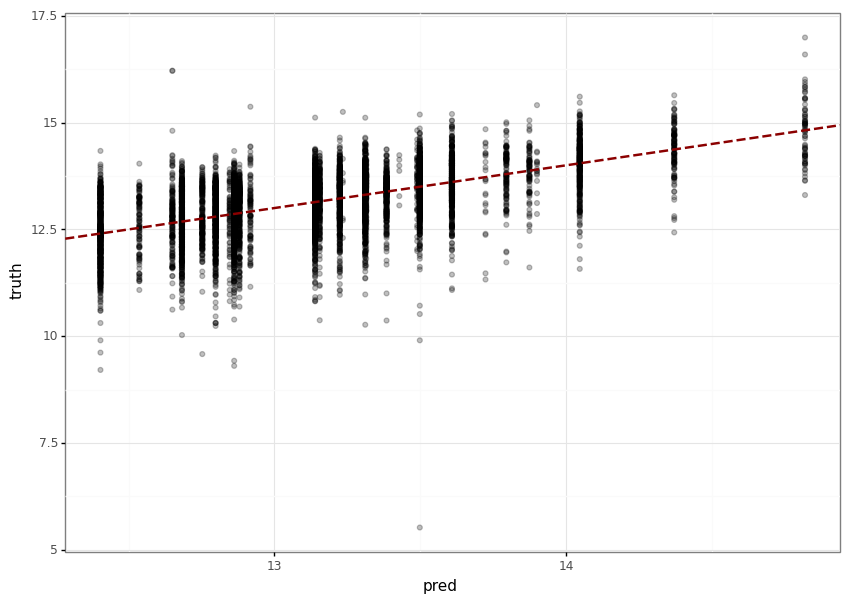

<ggplot: (337486553)>

In [38]:
# Plot performance 
(
    ggplot(pd.DataFrame(dict(pred=pred_y,truth=test_y)),aes(x='pred',y="truth")) +
    geom_point(alpha=.25) +
    geom_abline(linetype="dashed",color="darkred",size=1)+
    theme_bw() +
    theme(figure_size=(10,7))
)

# Coclusion
# As depicted above the best model is the Decision Tree with a depth of 5 as it seem s to produce the best model fit